In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import network
import funs

In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [59]:
imageShape = (473, 840, 3)
image_path = './sample_image/muju0004720.jpg'
image = cv2.imread(image_path)

In [180]:
# find connection in the specified sequence, center 29 is in the position 15

# indices of possible limb connections, 1-based
limbSeq = [[2,3], [2,6], [3,4], [4,5], [6,7], [7,8], [2,9], [9,10],
           [10,11], [2,12], [12,13], [13,14], [2,1], [1,15], [15,17],
           [1,16], [16,18], [3,17], [6,18]]

# indices into paf_avg for each limb
mapIdx = [[31,32], [39,40], [33,34], [35,36], [41,42], [43,44], [19,20], [21,22],
          [23,24], [25,26], [27,28], [29,30], [47,48], [49,50], [53,54], [51,52],
          [55,56], [37,38], [45,46]]

In [33]:
mapIdxMin = [[x-19 for x in mi] for k, mi in enumerate(mapIdx)]
print mapIdxMin

[[12, 13], [20, 21], [14, 15], [16, 17], [22, 23], [24, 25], [0, 1], [2, 3], [4, 5], [6, 7], [8, 9], [10, 11], [28, 29], [30, 31], [34, 35], [32, 33], [36, 37], [18, 19], [26, 27]]


In [179]:
# python indexing, as on the reference image
limbSeqMin = [[x-1 for x in mi] for k, mi in enumerate(limbSeq)]
print limbSeqMin

[[1, 2], [1, 5], [2, 3], [3, 4], [5, 6], [6, 7], [1, 8], [8, 9], [9, 10], [1, 11], [11, 12], [12, 13], [1, 0], [0, 14], [14, 16], [0, 15], [15, 17], [2, 16], [5, 17]]


In [21]:
NJOINTS = 18

In [20]:
# for every joint location, a list of [x,y,score,id]
all_peaks = list(np.load('all_peaks.npy'))

In [26]:
paf_avg = np.load('paf_avg.npy')

In [72]:
k = 4

In [167]:
x = np.array(all_peaks[0][0])

In [184]:
all_peaks[2:4]

[[(487, 29, 0.76028752, 9),
  (645, 43, 0.46017921, 10),
  (0, 129, 0.61845529, 11),
  (294, 171, 0.46419367, 12),
  (550, 172, 0.64268506, 13),
  (236, 177, 0.34052506, 14)],
 [(479, 56, 0.44949675, 15),
  (623, 64, 0.33203006, 16),
  (560, 230, 0.41462463, 17),
  (227, 231, 0.2424392, 18),
  (315, 236, 0.40370619, 19)]]

In [178]:
len(mapIdx)

19

In [177]:
len(funs.get_connections2(imageShape, paf_avg, all_peaks, mapIdx, limbSeq)[0])

19

In [160]:
funs.get_connections(imageShape, paf_avg, all_peaks, mapIdx, limbSeq)

([array([[  7.        ,  13.        ,   0.86162812,   3.        ,   4.        ],
         [  4.        ,   9.        ,   0.82548958,   0.        ,   0.        ],
         [  6.        ,  11.        ,   0.79630341,   2.        ,   2.        ],
         [  5.        ,  10.        ,   0.47081711,   1.        ,   1.        ],
         [  8.        ,  12.        ,   0.35868963,   4.        ,   3.        ]]),
  array([[  6.        ,  28.        ,   0.89543118,   2.        ,   2.        ],
         [  4.        ,  26.        ,   0.88362311,   0.        ,   0.        ],
         [  7.        ,  29.        ,   0.75593971,   3.        ,   3.        ],
         [  5.        ,  27.        ,   0.42671583,   1.        ,   1.        ],
         [  8.        ,  31.        ,   0.34132597,   4.        ,   5.        ]]),
  array([[ 13.        ,  17.        ,   0.57507281,   4.        ,   2.        ],
         [  9.        ,  15.        ,   0.56712618,   0.        ,   0.        ],
         [ 12.        , 

In [73]:
mid_num = 10
thre2 = 0.05
score_mid = paf_avg[:,:,[x-19 for x in mapIdx[k]]]
candA = all_peaks[limbSeq[k][0]-1]
candB = all_peaks[limbSeq[k][1]-1]
nA = len(candA)
nB = len(candB)
indexA, indexB = limbSeq[k]

score_mid.shape

(473, 840, 2)

In [34]:
i = 0
j = 0

In [49]:
vec = np.subtract(candB[j][:2], candA[i][:2])

In [51]:
np.linalg.norm(vec)

31.953090617340916

In [137]:
zeros = np.zeros(mid_num, dtype=np.int)
ones = np.ones(mid_num, dtype=np.int)
# tt = np.vstack([
        
        
#         ones]).T.astype(np.int)

In [134]:
ys = np.linspace(candA[i][1], candB[j][1], num=mid_num).astype(np.int)
xs = np.linspace(candA[i][0], candB[j][0], num=mid_num).astype(np.int)

In [128]:
score_mid.shape

(473, 840, 2)

In [139]:
score_mid[ys, xs, ones]

array([ 0.71456003,  0.73669541,  0.73407567,  0.73157549,  0.72269261,
        0.67044961,  0.64355934,  0.61066395,  0.59272277,  0.59856594], dtype=float32)

In [94]:
score_mid[]

(473, 840, 2)

In [76]:
jointvec = np.subtract(candB[j][:2], candA[i][:2])
norm = np.linalg.norm(jointvec)
vec = np.divide(jointvec, norm)

startend = zip(np.linspace(candA[i][0], candB[j][0], num=mid_num),
               np.linspace(candA[i][1], candB[j][1], num=mid_num))

vec_x = np.array([score_mid[int(round(startend[I][1])),
                            int(round(startend[I][0])), 0]
                  for I in range(len(startend))])
vec_y = np.array([score_mid[int(round(startend[I][1])),
                            int(round(startend[I][0])), 1]
                  for I in range(len(startend))])

score_midpts = np.multiply(vec_x, vec[0]) + np.multiply(vec_y, vec[1])
score_with_dist_prior = sum(score_midpts)/len(score_midpts) + min(0.5*imageShape[0]/norm-1, 0)
criterion1 = len(np.nonzero(score_midpts > thre2)[0]) > 0.8 * len(score_midpts)
criterion2 = score_with_dist_prior > 0


In [77]:
# quiver

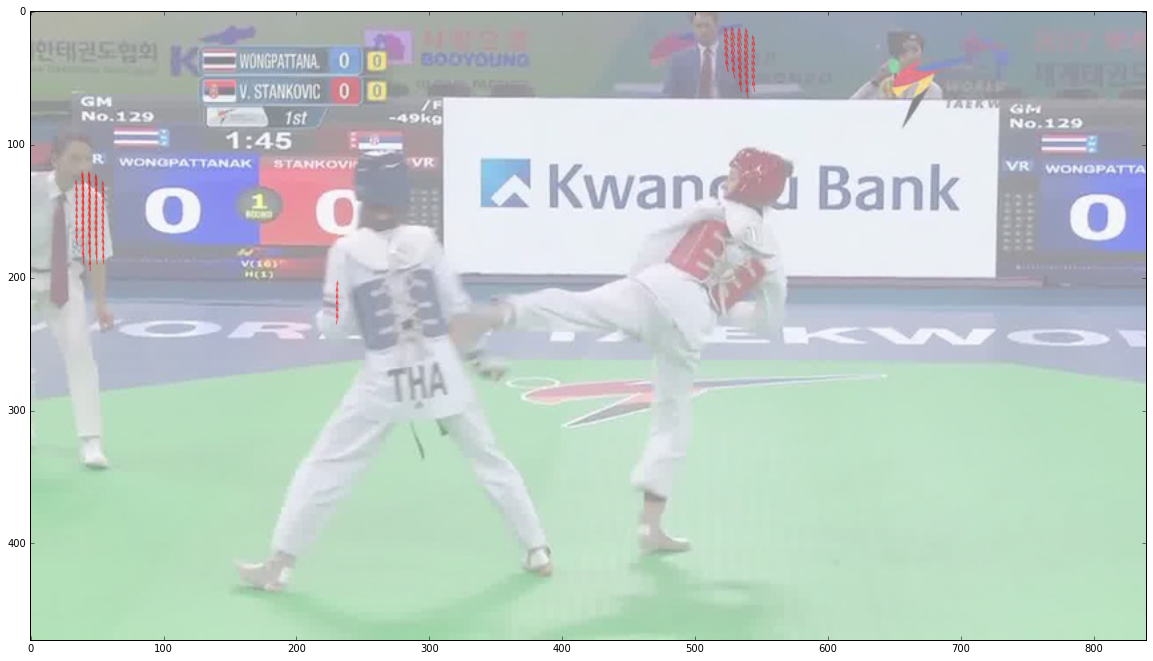

In [74]:
U = score_mid[:,:,0] * -1
V = score_mid[:,:,1]
X, Y = np.meshgrid(np.arange(U.shape[1]), np.arange(U.shape[0]))
M = np.zeros(U.shape, dtype='bool')
M[U**2 + V**2 < 0.5 * 0.5] = True
U = np.ma.masked_array(U, mask=M)
V = np.ma.masked_array(V, mask=M)

# 1
plt.figure()
plt.imshow(image[:,:,[2,1,0]], alpha = .5)
s = 5
Q = plt.quiver(X[::s,::s], Y[::s,::s], U[::s,::s], V[::s,::s], 
               scale=50, headaxislength=4, alpha=.5, width=0.001, color='r')

fig = plt.gcf()
fig.set_size_inches(20, 20)